# Resampling & Regularization

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# import data
data=pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#plot target against each feature
def scatter_plot(feature):
    plt.figure(figsize=(10,5))
    plt.scatter(data[feature],data['sales'])
    plt.xlabel(f'Money spent on {feature} ads ($)')
    plt.ylabel('Sales (k$)')
    plt.show()

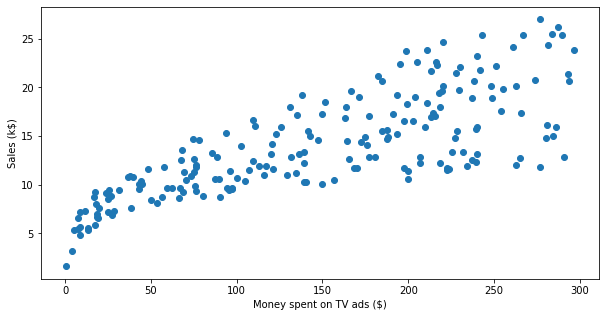

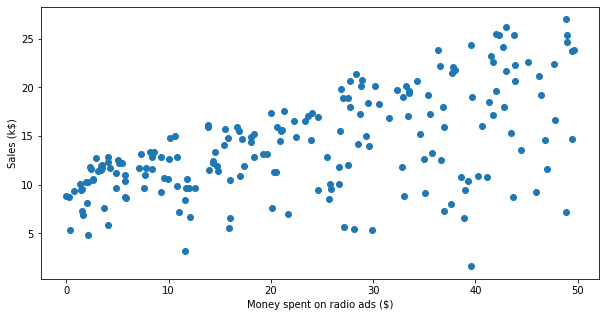

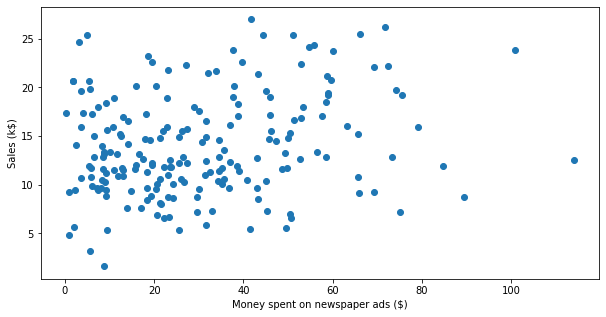

In [6]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

# Baseline model

In [7]:
#import libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [8]:
# reshape
X=data.drop(['sales'],axis=1)
y=data['sales'].values.reshape(-1,1)

In [11]:
#LinearRegression Model & resampling
lin_reg=LinearRegression()
MSEs=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print(-mean_MSE)

3.07294659710021


## Regularization

### ridge regression

In [13]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [14]:
# initialize model
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y);

In [16]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.0726713383411424


### Lasso

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso=Lasso(tol=0.05)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.404e+02, tolerance: 2.251e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


{'alpha': 1}
3.035998320911192
